In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

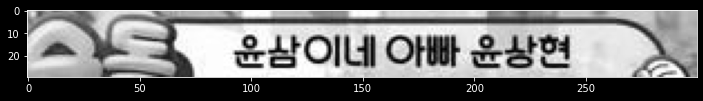

In [15]:
img_ori = cv2.imread('y1.jpg')
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

# Gaussian Blur and Adative Thresholding

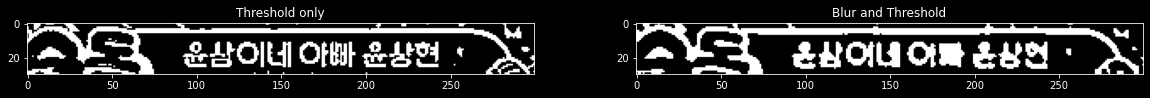

In [16]:
# threshold only
img_thresh = cv2.adaptiveThreshold(
    gray, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

# blur and threshold
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Threshold only')
plt.imshow(img_thresh, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Blur and Threshold')
plt.imshow(img_blur_thresh, cmap='gray')

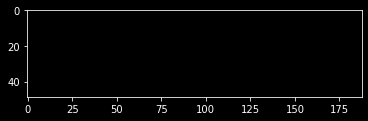

In [20]:
img_cropped = cv2.getRectSubPix(
    img_blur_thresh, 
    patchSize=(int(plate_width), int(plate_height)), 
    center=(int(plate_cx), int(plate_cy))
)

plt.imshow(img_cropped, cmap='gray')